In [1]:
import time

import numpy as np
np.set_printoptions()
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from context import src
from src.model.data_handler import save_datasets, load_datasets
from src.model.model import RubiksModel
from src.model.train import train

In [ ]:
# Creates a dataset with 2,000,000 random scrambled cubes between 5 and 21 solves
# First create a folder called "ignore". This will not be uploaded to github
datapath = save_datasets("ignore/", 2000000, 5000)

In [ ]:
datapath = "" # Use this if you are loading in an existing dataset

In [ ]:
internal_dimensions = ((2000, 1500, 500), (2500, 2500, 1000), (3000, 2500, 1500))
dropout_rates = [0, 0.1, 0.2]
learning_rates = [0.0008, 0.0005, 0.0002]
counter = 0 # set this to the next epoch after a crash and uncomment the next line
            # if it does crash, also edit the above lists to ensure you aren't retraining 
            # models you don't have to. 
results = {} # torch.load("models/results{}".format(counter))

for internal_dimension in internal_dimensions:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            model = RubiksModel(internal_dimensions=internal_dimension, dropout_rate=dropout_rate, activation=nn.ReLU)
            train_acc, train_loss, valid_acc, valid_loss = train(model, learning_rate=learning_rate, num_epochs=10, data_path=datapath, savepath="models/")
            results[(internal_dimension, dropout_rate, learning_rate)] = (train_acc, train_loss, valid_acc, valid_loss)
            torch.save(results, "models/results_{}".format(counter))
            counter += 1

0 (800, 800, 320, 0.3, 0.001) 2.23334683719635
1 (800, 800, 320, 0.3, 0.005) 2.285426057357788
2 (800, 800, 320, 0.3, 0.0001) 2.2638489223098754
3 (800, 800, 320, 0.5, 0.001) 2.2661198281478883
4 (800, 800, 320, 0.5, 0.005) 2.402115195579529
5 (800, 800, 320, 0.5, 0.0001) 2.2866964318466185
6 (800, 800, 320, 0.7, 0.001) 2.5852361255645753
7 (800, 800, 320, 0.7, 0.005) 2.8207526250839234
8 (800, 800, 320, 0.7, 0.0001) 2.607953653755188
9 (1500, 1500, 500, 0.3, 0.001) 2.2250081211471557
10 (1500, 1500, 500, 0.3, 0.005) 2.2549870809173584
11 (1500, 1500, 500, 0.3, 0.0001) 2.255958892555237
12 (1500, 1500, 500, 0.5, 0.001) 2.2317089212417605
13 (1500, 1500, 500, 0.5, 0.005) 2.3613300968551636
14 (1500, 1500, 500, 0.5, 0.0001) 2.2863158360671996
15 (1500, 1500, 500, 0.7, 0.001) 2.457374667930603
16 (1500, 1500, 500, 0.7, 0.005) 2.7665268840408324
17 (1500, 1500, 500, 0.7, 0.0001) 2.5456523714065553
18 (2500, 2500, 1000, 0.3, 0.001) 2.21583204536438
19 (2500, 2500, 1000, 0.3, 0.005) 2.250845

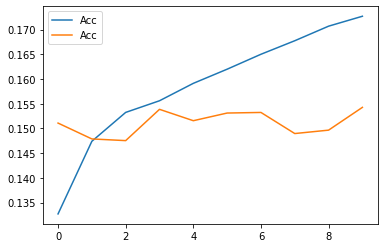

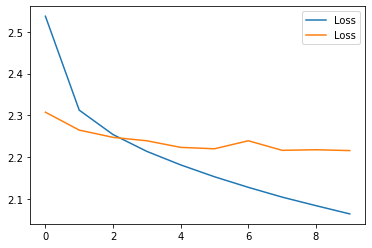

In [2]:
results = torch.load(r"FILE_PATH")

for i, item in enumerate(results):
    train_acc, train_loss, valid_acc, valid_loss = results[item]
    print(i, item, np.min(valid_loss))

train_acc, train_loss, valid_acc, valid_loss = results[(2500, 2500, 1000, 0.3, 0.001)]

plt.plot(np.arange(len(train_acc)), train_acc, np.arange(len(train_acc)), valid_acc, label="Acc")
plt.legend()
plt.show()
plt.plot(np.arange(len(train_loss)), train_loss, np.arange(len(train_loss)), valid_loss, label="Loss")
plt.legend()
plt.show()